<a href="https://colab.research.google.com/github/ashokteja123/Machine-Learning/blob/main/smart_budget_sector_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Smart Budget Allocation: Full Sector Prediction
### With GDP, Unemployment, and Sentiment (2020–2025)

In [ ]:
# 📦 Install dependencies (only if using Colab)
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 93.7 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving smart_budget_allocation_final data set.csv to smart_budget_allocation_final data set.csv


In [ ]:
# 📊 Load the enhanced dataset
import pandas as pd
df = pd.read_csv("smart_budget_allocation_final data set.csv")
df["Year"] = df["Year"].astype(int)
df.head()

,Year,Sector,Revenue (₹ Cr),Capital (₹ Cr),Total (₹ Cr),GDP Growth (%),Unemployment (%),Public Sentiment Score
0,2020,Agriculture,NaN,NaN,154775.0,4.2,6.1,5.5
1,2020,Health,NaN,NaN,67484.0,4.2,6.1,5.5
2,2020,Education,NaN,NaN,99312.0,4.2,6.1,5.5
3,2020,Rural Development,NaN,NaN,144817.0,4.2,6.1,5.5
4,2020,Road Transport,NaN,NaN,169637.0,4.2,6.1,5.5


In [ ]:
df_sorted = df.sort_values("Year")
display(df_sorted)


,Year,Sector,Revenue (₹ Cr),Capital (₹ Cr),Total (₹ Cr),GDP Growth (%),Unemployment (%),Public Sentiment Score
0,2020,Agriculture,NaN,NaN,154775.00,4.2,6.1,5.5
1,2020,Health,NaN,NaN,67484.00,4.2,6.1,5.5
2,2020,Education,NaN,NaN,99312.00,4.2,6.1,5.5
3,2020,Rural Development,NaN,NaN,144817.00,4.2,6.1,5.5
4,2020,Road Transport,NaN,NaN,169637.00,4.2,6.1,5.5
5,2022,Agriculture,132474.37,39.25,132513.62,8.5,5.2,7.2
6,2022,Health,80568.08,5632.57,86200.65,8.5,5.2,7.2
7,2022,Education,104259.71,18.01,104277.72,8.5,5.2,7.2
8,2022,Rural Development,138203.63,0.00,138203.63,8.5,5.2,7.2
9,2022,Road Transport,11363.71,187744.00,199107.71,8.5,5.2,7.2


/tmp/ipython-input-5-1971642874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_sorted, x='Total (₹ Cr)', y='Sector', inner='stick', palette='Dark2')


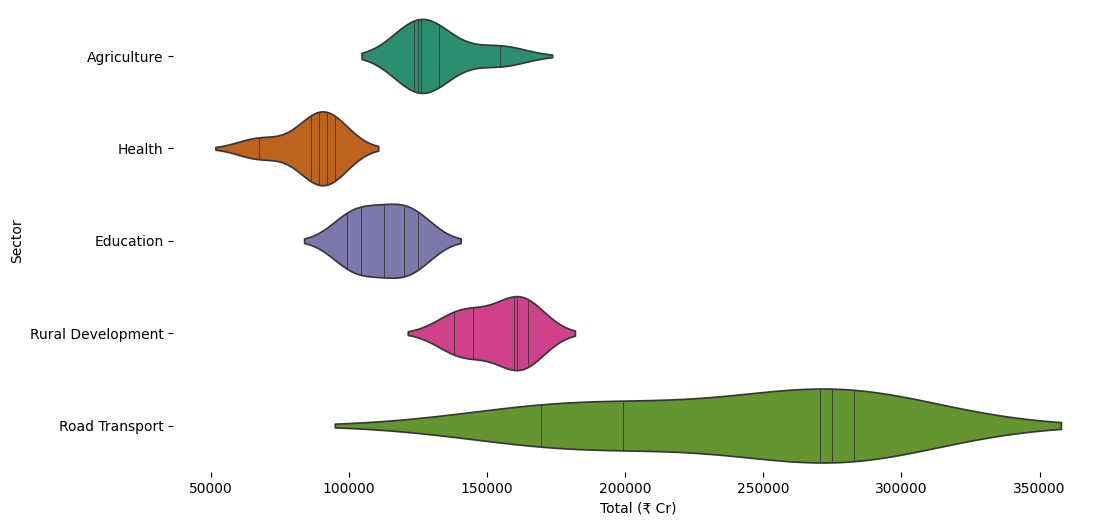

In [ ]:
# @title Sector vs Total (₹ Cr)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_sorted['Sector'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_sorted, x='Total (₹ Cr)', y='Sector', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

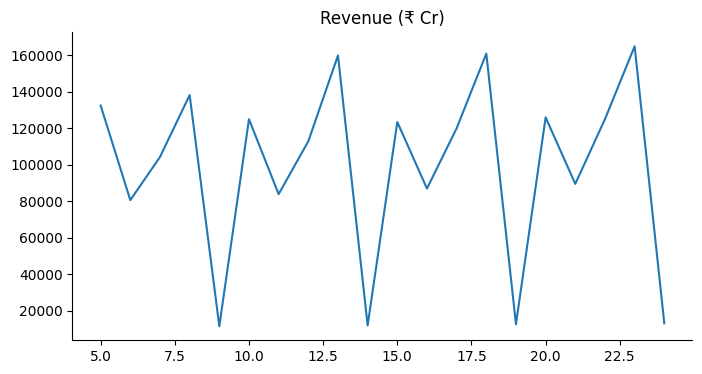

In [ ]:
# @title Revenue (₹ Cr)

from matplotlib import pyplot as plt
df_sorted['Revenue (₹ Cr)'].plot(kind='line', figsize=(8, 4), title='Revenue (₹ Cr)')
plt.gca().spines[['top', 'right']].set_visible(False)

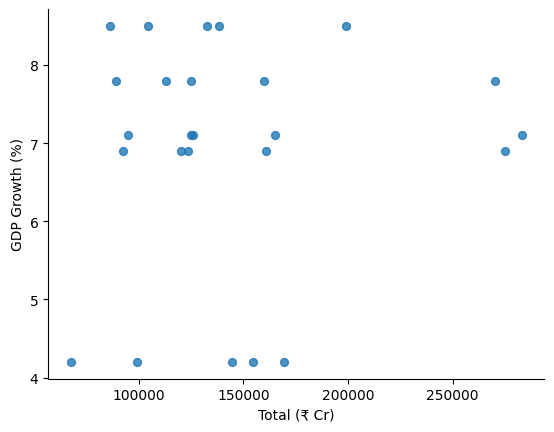

In [ ]:
# @title Total (₹ Cr) vs GDP Growth (%)

from matplotlib import pyplot as plt
df_sorted.plot(kind='scatter', x='Total (₹ Cr)', y='GDP Growth (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

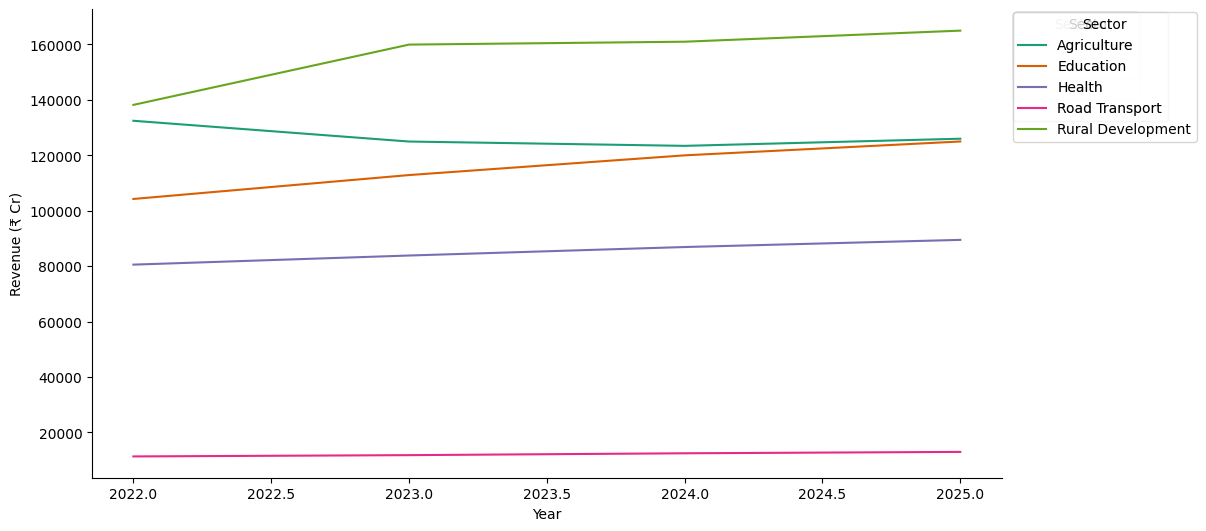

In [ ]:
# @title Year vs Revenue (₹ Cr)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Revenue (₹ Cr)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_sorted.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sector')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sector', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Revenue (₹ Cr)')

In [ ]:
# 🤖 Regression and prediction for all sectors
from sklearn.linear_model import LinearRegression
import pandas as pd

sectors = df["Sector"].unique()

print("📈 Predicted Budgets for 2026:\n")
for sector in sectors:
    sector_df = df[df["Sector"] == sector].dropna()
    X = sector_df[["Year", "GDP Growth (%)", "Unemployment (%)", "Public Sentiment Score"]]
    y = sector_df["Total (₹ Cr)"]

    model = LinearRegression()
    model.fit(X, y)

    input_2026 = pd.DataFrame([[2026, 7.0, 3.9, 8.5]], columns=X.columns)
    pred_2026 = model.predict(input_2026)
    print(f"{sector}: ₹{pred_2026[0]:,.2f}")

📈 Predicted Budgets for 2026:

Agriculture: ₹119,244.37
Health: ₹97,474.44
Education: ₹132,730.44
Rural Development: ₹193,149.28
Road Transport: ₹371,860.24


In [ ]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Sample mock sentiment/public priority score for each sector (scale 0–10)
priority_score = {
    "Agriculture": 18,
    "Health": 15,
    "Education": 17,
    "Rural Development": 14,
    "Road Transport": 14
}

# Set total budget for optimization (example)
total_budget = 700000  # in crore

# Create model
model = LpProblem("Smart_Budget_Allocation", LpMaximize)

# Define decision variables (budget per sector)
sectors = df["Sector"].unique()
budget_vars = {sector: LpVariable(sector, lowBound=0) for sector in sectors}

# Objective: Maximize weighted public satisfaction
model += lpSum(priority_score[s] * budget_vars[s] for s in sectors)

# Constraint: Total budget must not exceed limit
model += lpSum(budget_vars[s] for s in sectors) <= total_budget

# Solve
model.solve()

# Output
print("🔍 Optimal Allocation (₹ Cr):")
for s in sectors:
    print(f"{s}: ₹{budget_vars[s].value():,.2f}")


🔍 Optimal Allocation (₹ Cr):
Agriculture: ₹700,000.00
Health: ₹0.00
Education: ₹0.00
Rural Development: ₹0.00
Road Transport: ₹0.00


In [ ]:
import pandas as pd
from pulp import LpProblem, LpMaximize, LpVariable, lpSum
import math
# Load your enhanced dataset
df = pd.read_csv("smart_budget_allocation_final data set.csv")
df["Year"] = df["Year"].astype(int)
df_latest = df[df["Year"] == 2025].dropna()

# Extract sectoral values
sectors = df_latest["Sector"].values
sentiment = df_latest.set_index("Sector")["Public Sentiment Score"].to_dict()
gdp = df_latest.set_index("Sector")["GDP Growth (%)"].to_dict()
unemployment = df_latest.set_index("Sector")["Unemployment (%)"].to_dict()

# Total budget for optimization
total_budget = 700000  # in ₹ crore

# Optional: realistic sector bounds (example values)
sector_bounds = {
    "Agriculture": (60000, 130000),
    "Health": (80000, 100000),
    "Education": (100000, 130000),
    "Rural Development": (120000, 170000),
    "Road Transport": (250000, 290000)
}

# Initialize model
model = LpProblem("smart_budget_allocation_final data set.csv", LpMaximize)

# Define decision variables
budget_vars = {s: LpVariable(s, lowBound=0) for s in sectors}

# Objective: Redefined to be linear.
# It now maximizes a weighted sum of sentiment, GDP impact, and unemployment penalty.
# The direct log term is removed.
model += lpSum(
    (sentiment[s] * budget_vars[s]) + # Directly use sentiment as a weight
    (0.3 * gdp[s] * budget_vars[s] / 1000) -
    (0.2 * unemployment[s] * budget_vars[s] / 1000)
    for s in sectors
)
# Budget constraint
model += lpSum(budget_vars[s] for s in sectors) <= total_budget
# Sector-specific constraints
for s in sectors:
    if s in sector_bounds:
        model += budget_vars[s] >= sector_bounds[s][0]
        model += budget_vars[s] <= sector_bounds[s][1]

# Solve and output results
model.solve()
print("Optimized Budget Allocation (₹ Cr):")
for s in sectors:
    print(f"{s}: ₹{budget_vars[s].value():,.2f}")



Optimized Budget Allocation (₹ Cr):
Agriculture: ₹60,000.00
Health: ₹80,000.00
Education: ₹100,000.00
Rural Development: ₹170,000.00
Road Transport: ₹290,000.00


/usr/local/lib/python3.11/dist-packages/pulp/pulp.py:1455: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


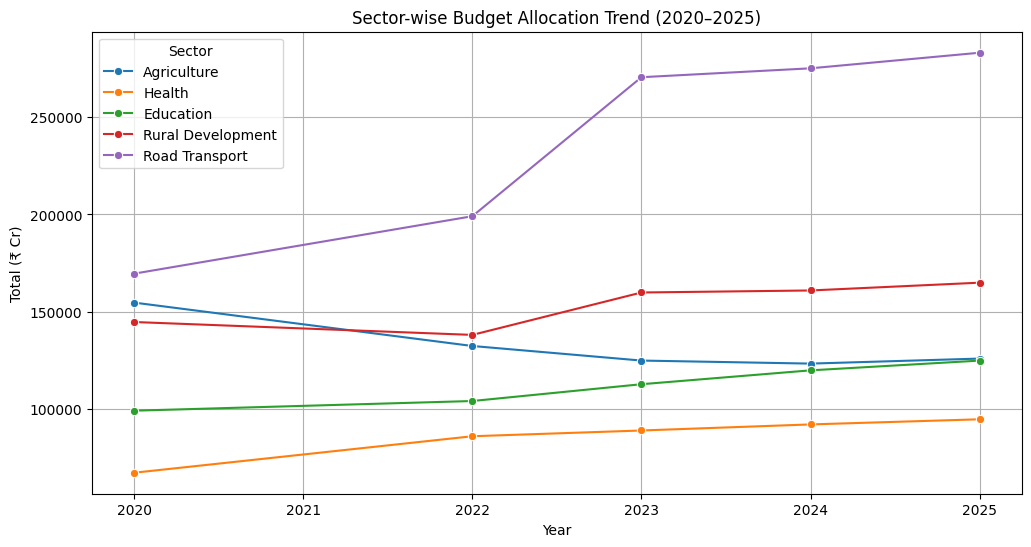

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trend of each sector over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Total (₹ Cr)", hue="Sector", marker="o")
plt.title("Sector-wise Budget Allocation Trend (2020–2025)")
plt.grid(True)
plt.show()


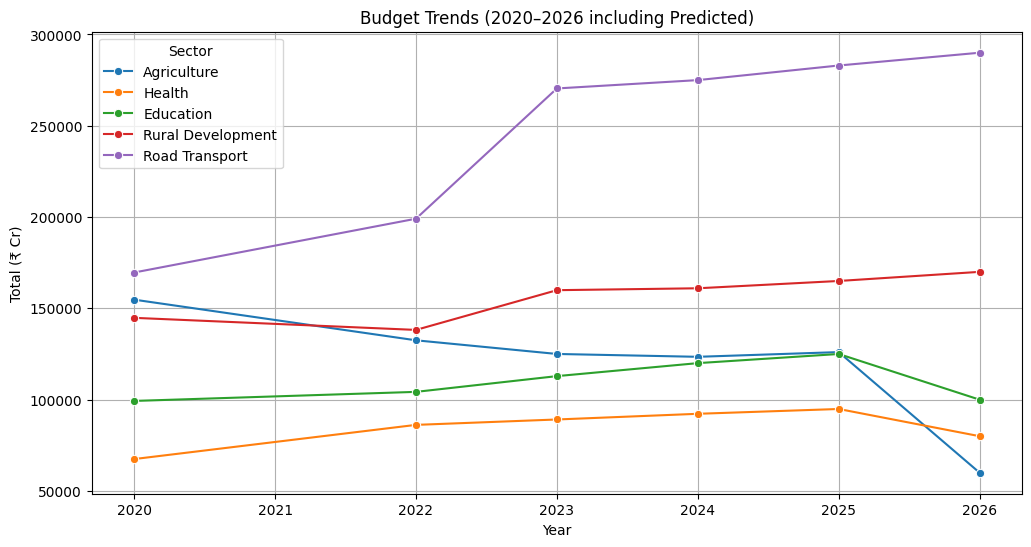

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare a list to hold the new 2026 data rows
new_data_rows = []

# Append 2026 data to a list
# Use the results from the pulp optimization, which are stored in budget_vars
for s in sectors:
    # Check if the sector 's' exists in the budget_vars dictionary before accessing its value
    if s in budget_vars and budget_vars[s].value() is not None:
         new_data_rows.append({
            "Year": 2026,
            "Sector": s,
            "Total (₹ Cr)": budget_vars[s].value() # Use the value from the optimization
         })
    else:
        # Handle cases where a sector might not be in the budget_vars if necessary
        print(f"Warning: No optimized budget found for sector: {s}")


# Convert the list of dictionaries to a DataFrame
df_2026 = pd.DataFrame(new_data_rows)

# Concatenate the new 2026 data DataFrame with the original df
# Use ignore_index=True to reset the index of the resulting DataFrame
df = pd.concat([df, df_2026], ignore_index=True)


plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Total (₹ Cr)", hue="Sector", marker="o")
plt.title("Budget Trends (2020–2026 including Predicted)")
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload .py and .csv files here


In [ ]:
from google.colab import files
uploaded = files.upload()  # Now choose smart_budget_allocation_enhanced.csv


In [ ]:
!pip install streamlit pyngrok --quiet

# Upload your files
from google.colab import files
uploaded = files.upload()  # Upload smart_budget_dashboard.py and smart_budget_allocation_enhanced.csv

# Run Streamlit in background
!streamlit run smart_budget_dashboard.py &>/content/logs.txt &


In [ ]:
from pyngrok import conf, ngrok
conf.get_default().auth_token = "2xDBFc0nmJA8Wo51LRTKXrNMaRB_2snJBUBz8ZtiAa2kryFcN"
public_url = ngrok.connect(8501)
print("🔗 Streamlit app running at:", public_url)
